In [1]:
DATA_PATH='c:/Users/Ahmed Sadek/Fraud Detection Project/preprocessing_df.pkl'
ANALYTIC_PATH='c:/Users/Ahmed Sadek/Fraud Detection Project/analytic_df.pkl'

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle
import logging

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df =pd.read_pickle(DATA_PATH)

In [4]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,3,181.00,181.00,0.00,0.0,0.00,1,0
3,1,0,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,1,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,1,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,1,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [5]:
#checking outliers 

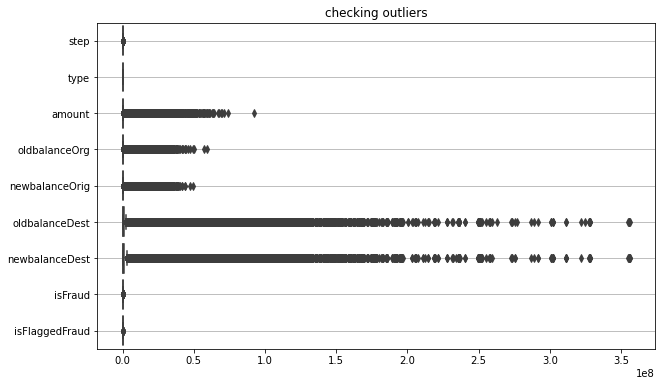

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,orient='h')
plt.title("checking outliers")
plt.grid(axis='y')
plt.show()

In [7]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

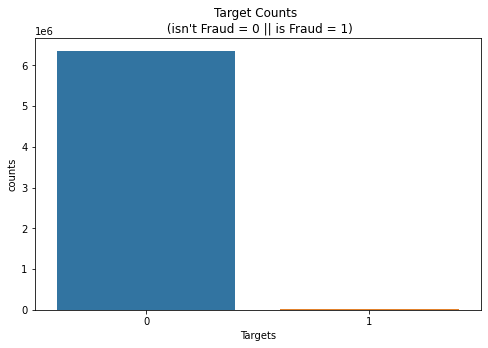

In [9]:
data_fraud=df['isFraud'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=data_fraud.index,y=data_fraud.values)
plt.xlabel('Targets')
plt.ylabel('counts')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.show()

In [10]:
df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


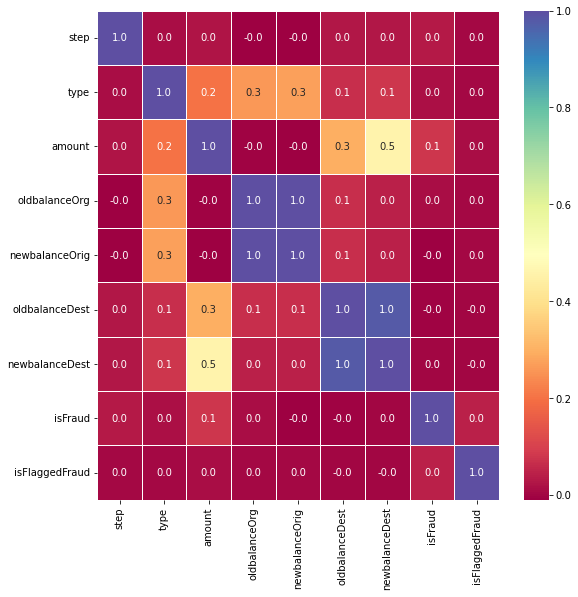

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

In [12]:
#from pervious analze we notice that correlation between old and new balance very closed 

In [13]:
#showing corr between old and new balance 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


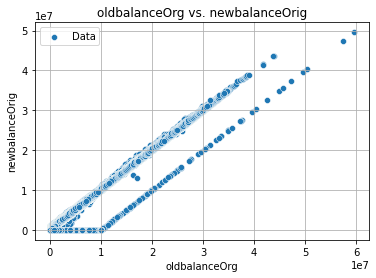

In [14]:
sns.scatterplot(df['oldbalanceOrg'],df['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

In [15]:
#Based on pervious analsis and corr we found uncessary features so dropping them

In [16]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [17]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [18]:
df.shape

(6362620, 8)

In [19]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,1,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,3,181.00,181.00,0.00,0.0,0.00,1
3,1,0,181.00,181.00,0.00,21182.0,0.00,1
4,1,1,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,1,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,1,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,1,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,1,4024.36,2671.00,0.00,0.0,0.00,0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
type,6362620.0,1.055307e+00,9.808966e-01,0.0,0.00,1.000,2.000000e+00,4.000000e+00
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [21]:
df.to_pickle(ANALYTIC_PATH)